# Data Pulling

This notebook applies and tests the data pulling functions in the `src` directory

In [1]:
import sys
import os
from os.path import join
import yaml
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

project_dir = join(os.getcwd(), os.pardir)
sys.path.append(project_dir)

from src.data import count_tweets, pull_tweets

%config InlineBackend.figure_format = 'svg'

## 1. Check query and configurations

In this section we will check which are the necessary parameters to pass and assess the quality of the final query by running a tweet count.

In [2]:
yaml_path = join(project_dir, 'configs.yaml')
configs = yaml.full_load(open(yaml_path, 'r'))['twitter_data_pull']
configs['save_path'] = join(project_dir, configs['save_path'])
configs['credentials_path'] = join(project_dir, configs['credentials_path'])
configs['yaml_key'] = configs['credentials_key']
del configs['credentials_key']

configs

{'credentials_path': '/Users/jfonseca/Desktop/research_projs/IWMI/solve-iwmi/notebooks/../twitter_creds.yaml',
 'save_path': '/Users/jfonseca/Desktop/research_projs/IWMI/solve-iwmi/notebooks/../data/raw/',
 'results_per_call': 500,
 'max_results': 3000,
 'file_name': 'complete_data_pull.json',
 'from_date': '2020-05-01',
 'to_date': '2020-06-15',
 'query': 'Amphan OR Ampan OR अम्फान OR ঘূর্ণিঝড় OR হ্যারিকেন OR আম্পান OR আমপান OR অ্যাম্ফান OR ସାଇକ୍ଲୋନ୍ OR ମହାବାତ୍ୟାର OR ଆମ୍ଫାନ୍ -nisarga -(ARB 01) -নিসর্গ -ब्रह्मांड -ବ୍ରହ୍ମାଣ୍ଡ',
 'count_bucket': 'day',
 'verbose': True,
 'yaml_key': 'search_tweets_api'}

In [3]:
counts = count_tweets(**configs)

2020-07-25 03:36:52,776 - src.data._pull_data - INFO - Counting Tweets
2020-07-25 03:36:53,240 - searchtweets.credentials - WARNING - Grabbing bearer token from OAUTH
2020-07-25 03:36:53,243 - searchtweets.result_stream - INFO - using bearer token for authentication
2020-07-25 03:36:53,244 - searchtweets.result_stream - INFO - disabling tweet parsing due to counts API usage
2020-07-25 03:36:53,717 - searchtweets.result_stream - INFO - paging; total requests read so far: 1
2020-07-25 03:36:53,935 - searchtweets.result_stream - INFO - ending stream at 45 tweets


Total amount of tweets found: 594365


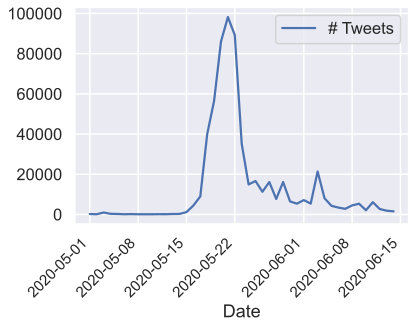

In [4]:
n_tweets = 0
for date in counts:
    n_tweets+=date['count']

print(f'Total amount of tweets found: {n_tweets}')

df_counts = pd.DataFrame(counts)
df_counts.timePeriod = pd.to_datetime(df_counts.timePeriod)
df_counts = df_counts\
    .rename(columns={'count':'# Tweets', 'timePeriod': 'Date'})\
    .set_index('Date')\
    .sort_index()

sns.set(style="darkgrid", context="talk")
sns.lineplot(
    data=df_counts,
)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)

plt.show()

## 2. Test Pull Data on Sandbox account

In [5]:
yaml_path = join(project_dir, 'configs.yaml')
configs = yaml.full_load(open(yaml_path, 'r'))['test_data_pull']
configs['save_path'] = join(project_dir, configs['save_path'])
configs['credentials_path'] = join(project_dir, configs['credentials_path'])
configs['yaml_key'] = configs['credentials_key']
del configs['credentials_key']

configs

{'credentials_path': '/Users/jfonseca/Desktop/research_projs/IWMI/solve-iwmi/notebooks/../twitter_creds.yaml',
 'save_path': '/Users/jfonseca/Desktop/research_projs/IWMI/solve-iwmi/notebooks/../data/raw/',
 'results_per_call': 100,
 'max_results': 300,
 'from_date': '2020-05-14',
 'to_date': '2020-06-15',
 'query': '((cyclone OR cyclonic OR cyclonical OR hurricane OR storm) (Amphan OR Ampan))',
 'count_bucket': 'day',
 'verbose': True,
 'yaml_key': 'sample_tweets_api'}

In [6]:
pull_tweets(**configs)

2020-07-23 02:30:34,979 - src.data._pull_data - INFO - Pulling raw Twitter data
2020-07-23 02:30:35,412 - searchtweets.credentials - WARNING - Grabbing bearer token from OAUTH
2020-07-23 02:30:35,413 - searchtweets.result_stream - INFO - using bearer token for authentication
2020-07-23 02:30:36,305 - searchtweets.result_stream - INFO - paging; total requests read so far: 1
2020-07-23 02:30:36,791 - searchtweets.result_stream - INFO - paging; total requests read so far: 2
2020-07-23 02:30:37,326 - searchtweets.result_stream - INFO - ending stream at 300 tweets
2020-07-23 02:30:37,348 - src.data._pull_data - INFO - Data successfuly saved at "/Users/jfonseca/Desktop/research_projs/IWMI/solve-iwmi/notebooks/../data/raw/SAMPLE_DATA_QUERY_((cyclone OR cyclonic OR cyclonical OR hurricane OR storm) (Amphan OR Ampan))_FROMDATE_2020-05-14_TODATE_2020-06-15.json"
